<a href="https://colab.research.google.com/github/ksh-dong/Python25Study/blob/main/05_03_%ED%8A%B8%EB%A6%AC%EC%9D%98%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 지금까지 k-최근접이웃알고리즘, 선형회귀, 릿지, 라쏘, 다항회귀, 로지스틱회귀
# 등을 배웠고 확률적경사하강법을 이용한 분류과 결정트리 모델까지 학습을 함

# 테스트 세트말고 검증세트를 사용하는 cv(교차검증), 하이퍼파라미터튜닝등을 사용

# 코렙에는 왠만한 AI용 라이브러리가 설치 되어 있는데 안되어 있는 것은 수동 설치!!!
!pip install xgboost
!pip install pycaret

In [ ]:
# 앙상블 : 단어 그대로 여러 단순한 모델을 결합하여 정확한 모델을 만드는 방법
# 정형데이터 : 지금까지 학습한 수치자료가 있는 값
# 비정형데이터 : 데이터베이스나 엑셀로 표현하기 어려운 데이터
#       (텍스트데이터, 디카사진, mp3 등.) -> 신경망 알고리즘

# 랜덤 포레스트 : 결정 트리를 랜덤하게 만들어 결정트리(나무)숲 을 만듬
#       -> 최종 예측

# 1000개의 샘플이 들어 있는 가방에서 100개을 샘플을 뽑을때 1개를 뽑고
# 뽑앗던 1개를 다시 가방에 넣음
# 중복된 샘플을 뽑을 수 있음 -> 부트스트랩 샘플이라고 함
# 부트스트랩 : 데이터 세트에서 중복을 허용하여 데이터를 샘플링

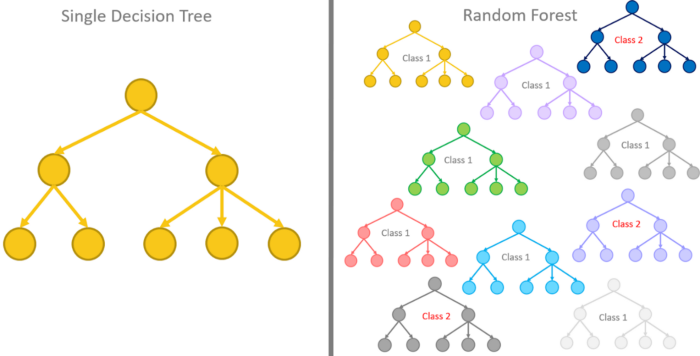

In [ ]:
# 분류 모델인 : RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근 특성 선택
# 즉 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택하여 사용
# 다만 회귀 모델인 RandomForestRegressor는 전체 특성을 사용
# 사이킷 런의 랜덤 포레스트는 기본적으로 100개의 결정 트리를 이런 방식으로 훈련한다.

# 그 다음 분류일 때는 각 트리의 클래스별 확률을 평균하여
# 가장 높은 확율을 가진 클래스를 예측으로 삼는다.
# 회귀일 때는 단순히 각 트리의 예측을 평균함.

# 분류 : 샘플을 몇개의 클래스 중 하나로 분류하는 문제
# 회귀 : 임의의 어떤 숫자를 예측하는 문제

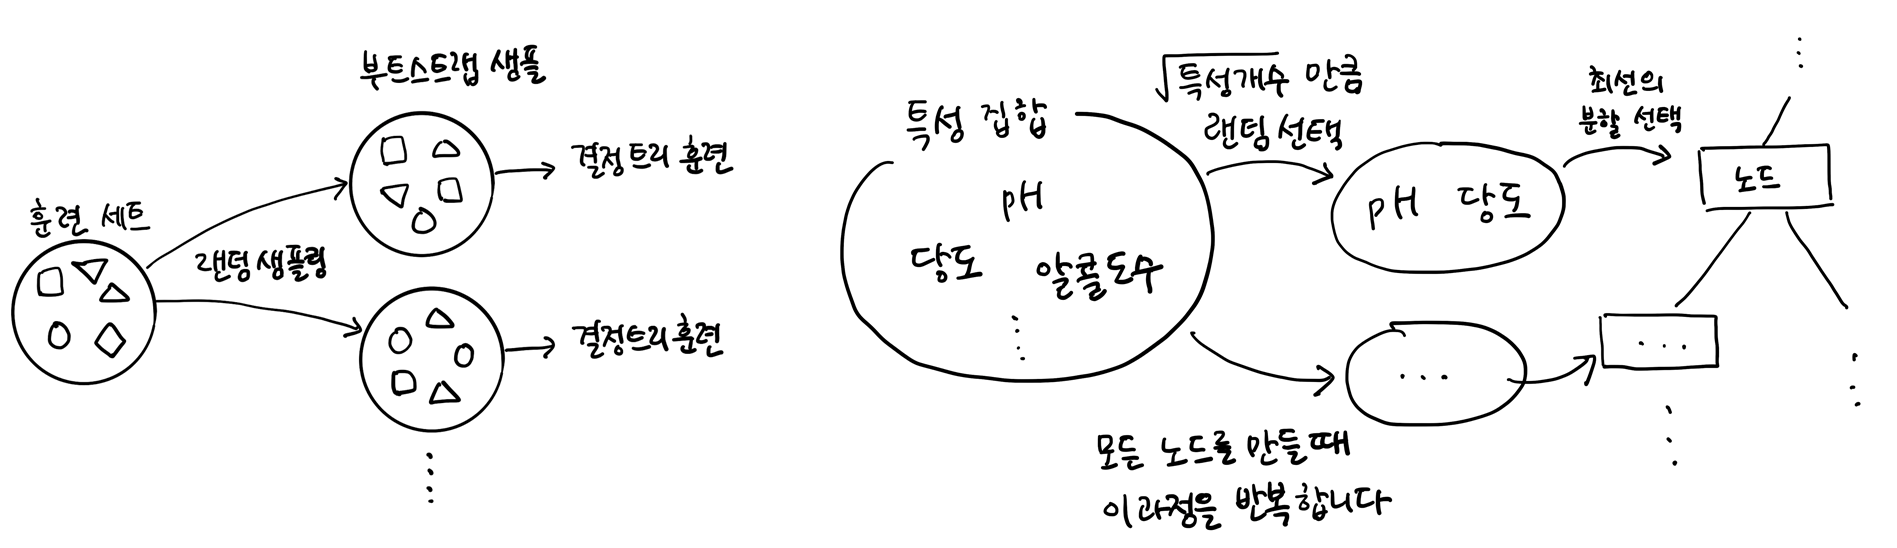

In [2]:
# 와인찾기 데이터
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [3]:
target

array([0., 0., 0., ..., 1., 1., 1.])

In [5]:
# 훈련세트 80% 와 테스트세트 20% 로 나눔
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

print(train_input.shape, test_input.shape)
# 여기서 만든 테스트 20%는 검증이 끝난 마지막 단계에서 평가용으로 사용

(5197, 3) (1300, 3)


In [7]:
from sklearn.model_selection import cross_validate # 크로스 검증용
from sklearn.ensemble import RandomForestClassifier # 100개의 결정 트리 사용

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# train_score 과대 적합 0.9973541965122431

0.9973541965122431 0.8905151032797809


In [9]:
# 랜덤 포레스트는 결정트리의 앙상블이기 때문에 결정트리가 제공하는 중요한 매개변수를 모두 제공함
# 결정 트리의 큰 장점중 하나인 특성 중요를 계산한다.
# 랜덤 포레스트의 특성 중요도는 각 결정 트리의 특성 중요도를 취합 한 것이다.
# 훈련 후에 중요도를 출력 해보자.
rf.fit(train_input, train_target)   # 훈련 후 특성 중요도 출력
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [10]:
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 현재 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

# 알콜도수   , 당도      , pH 비교 해보자.
# 당도의 중요도가 감소하고, 알콜 도수와 pH 중요도가 상승함
# 이유는 랜덤포레스트가 특성 일부를 랜덤하게 선택하여 결정 트리를 훈련함(중복허용)
# 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회가 됨(과대적합을 줄임)


In [13]:
# RandomForestClassifier기능중에 자체적으로 모델을 평가하는 점수를 얻을 수 있다.
# OOB(Out Of Bag)부트스트랩에 포함되지 않고 남은 샘플 -> 결정 트리 평가용(검증 세트로 활용)
# oob_score=True -> 랜덤 포레스트는 각 결정 트리의 OOB 점수를 평균하여 출력(oob_score_)
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)    # 교차 검증 점수와 비슷한 결과를 얻음
# OOB 점수를 사용하면 교차 검증을 대신할 수 있어 결과적으로 훈련 세트에 더 많은 샘플을 사용할수 있음
################### RandomForestClassifier 끝 ###########################

0.8934000384837406
